# Ejercicios

Antes de realizar los ejercicios, revisa los conceptos adquiridos durante la sesión leyendo el [pdf del profesor Fernando Berzal](data/Clustering-Hierarchical.pdf) sobre esta temática.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')


In [3]:
X = df.iloc[:,[3,4]].values


**1. Comprueba si según el método del Silhoutte Score el número óptimo de clusteres para este dataset es 5.**

In [4]:
from sklearn.metrics import silhouette_score
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

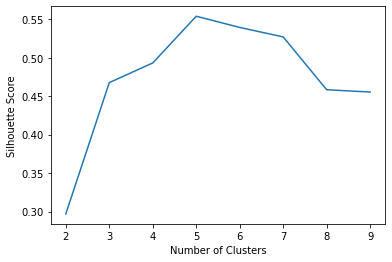

In [5]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

**2. Interpreta la siguiente imagen de un dendograma y extrae conclusiones. ¿Cuántos clusteres deberían de crearse? ¿Por qué? ¿Qué representan las flechas?**
<img src=img/ejercicio2.png>

Yo creo que deberían crearse 2 ya que si trazamos una linea horizontal que pueda cruzar la distancia máxima verticalmente sin intersectar un clúster, nos cortaría 2 lineas las cuales son las que formarían nuestros clusteres.
Las flechas representan aquellos puntos menos similares en el conjunto del resto de valores
-las distancias , verticales significan que son valores distintos

**3. ¿Cuales son las principales diferencias entre el algoritmo K-means y el Clustering Jerárquico?**

DIFERENCIAS

**K-means**: 1.En el kmeans debemos especificar el numero de clusteres de antemano y los resultados finales son sensibles a la inicialización.
2.Tenemos como factor limitante la K ya que para interpretarla se hace más complejo en datos que no conocemos
3.Se puede usar la mediana o la media como centro de grupo para representar cada grupo.
4.Los métodos utilizados normalmente son menos intensivos en computación y se adaptan a conjuntos de datos muy grandes.

**Clustering Jerárquico**: 1. En el CJ tendremos dos metodos para la el numero de clusteres,agrupacion aglomerativa y agrupación divisiva.
2.En la agrupación jerárquica uno puede detenerse en cualquier número de agrupaciones, que se considere apropiado interpretando el dendrograma.
3.Los métodos de aglomeración comienzan con 'n' grupos y combinan secuencialmente grupos similares hasta que solo se obtiene un grupo
4.Los métodos divisivos funcionan en la dirección opuesta, comenzando con un grupo que incluye todos los registros y los métodos jerárquicos son especialmente útiles cuando el objetivo es organizar los grupos en una jerarquía natural.

**4. Toma como base el dataset winequality-red.csv y aplica un algoritmo de clustering jerárquico a dicho dataset considerando las features: pH, alcohol, sulphates y total sulfur dioxide. Responde a las siguientes preguntas: 4.1. ¿Cuál es la media, max, min de dichas características? 4.2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica. 4.3. ¿Cuál es el número óptimo de clústers que obtienes para este dataset? 4.4. Una vez obtenido el valor óptimo de K, genera un modelo AgglomerativeClustering y entrénalo con los datos anteriores- 4.5. Invéntate diversas predicciones para saber en qué clúster se asignan.**

In [6]:
#4.1. ¿Cuál es la media, max, min de dichas características?
import pandas as pd
df = pd.read_csv('./data/winequality-red.csv',sep=';')
df_columnas_requeridas = df[['pH','alcohol','sulphates','total sulfur dioxide']]
df_columnas_requeridas

,pH,alcohol,sulphates,total sulfur dioxide
0,3.51,9.4,0.56,34.0
1,3.20,9.8,0.68,67.0
2,3.26,9.8,0.65,54.0
3,3.16,9.8,0.58,60.0
4,3.51,9.4,0.56,34.0
...,...,...,...,...
1594,3.45,10.5,0.58,44.0
1595,3.52,11.2,0.76,51.0
1596,3.42,11.0,0.75,40.0
1597,3.57,10.2,0.71,44.0


In [7]:
df_columnas_requeridas.describe()

,pH,alcohol,sulphates,total sulfur dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.311113,10.422983,0.658149,46.467792
std,0.154386,1.065668,0.169507,32.895324
min,2.740000,8.400000,0.330000,6.000000
25%,3.210000,9.500000,0.550000,22.000000
50%,3.310000,10.200000,0.620000,38.000000
75%,3.400000,11.100000,0.730000,62.000000
max,4.010000,14.900000,2.000000,289.000000


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_normalizado = ss.fit_transform(df_columnas_requeridas)
df_normalizado

array([[ 1.28864292, -0.96024611, -0.57920652, -0.37913269],
       [-0.7199333 , -0.58477711,  0.1289504 ,  0.62436323],
       [-0.33117661, -0.58477711, -0.04808883,  0.22904665],
       ...,
       [ 0.70550789,  0.54162988,  0.54204194, -0.19667889],
       [ 1.6773996 , -0.20930812,  0.30598963, -0.07504302],
       [ 0.51112954,  0.54162988,  0.01092425, -0.13586095]])

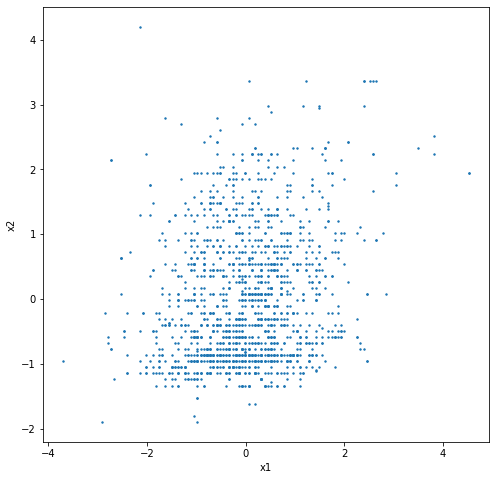

In [9]:
#4.2. ¿Cuál es la distribución espacial del dataset?
X2 = df_normalizado
#y = df.iloc[:,-1].values
plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

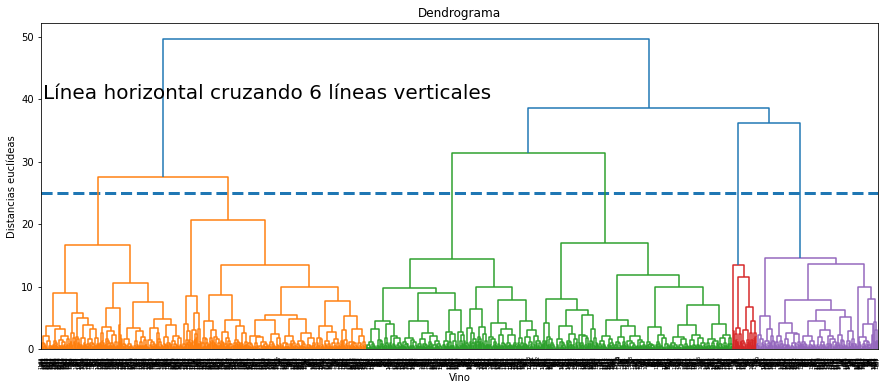

In [10]:
#4.3. ¿Cuál es el número óptimo de clústers que obtienes para este dataset?
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Vino')
plt.ylabel('Distancias euclídeas')
plt.hlines(y=25,xmin=0,xmax=20000,lw=3,linestyles='--')
plt.text(x=45,y=40,s='Línea horizontal cruzando 4 líneas verticales',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X2, method = 'ward'))
plt.show()

In [11]:
# 4.4. Una vez obtenido el valor óptimo de K, genera un modelo AgglomerativeClustering y entrénalo con los datos anteriores
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)
y_hc

array([1, 4, 4, ..., 2, 1, 0], dtype=int64)

Aunque el algoritmo muestre que la division es de 4 grupos/clusteres, cuando lo graficamos vemos que hay una fina separación entre los dos conjuntos de datos agrupados, entonces podriamos decir que realmente se distinguen en dos grupos.

No handles with labels found to put in legend.


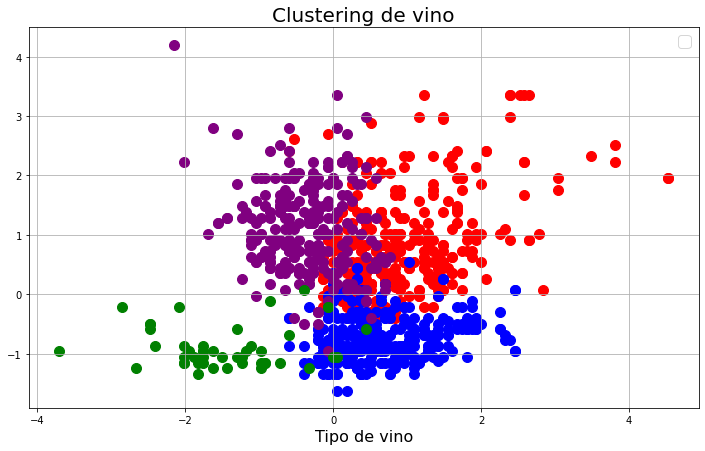

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(X2[y_hc == 0, 0], X2[y_hc == 0, 1], s = 100, c = 'red')
plt.scatter(X2[y_hc == 1, 0], X2[y_hc == 1, 1], s = 100, c = 'blue')
plt.scatter(X2[y_hc == 2, 0], X2[y_hc == 2, 1], s = 100, c = 'purple')
plt.scatter(X2[y_hc == 3, 0], X2[y_hc == 3, 1], s = 100, c = 'green')

plt.title('Clustering de vino',fontsize=20)
plt.xlabel('Tipo de vino',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [15]:
#4.5. Invéntate diversas predicciones para saber en qué clúster se asignan.
import numpy as np
#No permitido por que tendría que calcular de nuevo al crear un punto nuevo
X_new = np.array([[-1.84, -1.40, 0.3, 1.38, -1.6], [0.98, -0.34, 2, 0.49, 1.17], [0.98, -0.34, 2, 0.49, -0.59], [0.80, -1.34, 2, 0.94, 1.17],[-1.84, -1.40, 0.3, 1.38, -1.6],[-1.84, -1.40, 0.3, 1.38, -1.6]])
hc.fit_predict(X_new)

array([5, 3, 2, 4, 1, 0], dtype=int64)